In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [83]:
df = pd.read_csv("/content/ecommerce-dataset.csv")

In [ ]:
df.columns

Index(['OrderID', 'CustomerID', 'OrderDate', 'ProductID', 'ProductCategory',
       'Quantity', 'Price', 'TotalAmount', 'CustomerLocation'],
      dtype='object')

In [ ]:
df.head()

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,Quantity,Price,TotalAmount,CustomerLocation
0,23f2da2d-4cc5-42e1-bc62-a7d0e42ea50a,4a1f73ba-3579-404f-b0a1-1815b470b8c2,2024-06-19,cdce9658-d862-4586-98ac-ab37934c7ac7,Electornics,5,140.57,NaN,Asia
1,8f9875b3-26d8-4a8c-9324-e2803f5a0204,ede013c6-46b3-49a7-97ea-ecc0955f3565,2024-03-30,ac917e14-629d-4140-9fea-9ee12eb441ac,Sportz,4,361.35,4205.49,Australia
2,1b7a4ea3-ea9f-4eb8-9d1d-62d316222797,a38beec4-baf2-49b9-abcb-61c01270ff80,2024-03-13,f278d163-d312-4e5c-bea3-351de7ab1597,Boks,9,22.73,1550.21,South America
3,9d3eef19-d02c-4526-9662-d87b7fe5c73f,bf74c160-73fb-4c3a-93a5-e78ec99ad9bb,2024-06-01,d7bbf3e9-b485-47ee-914c-42b7007b0a78,Beuty,2,15.15,3423.19,Asia
4,aac37d22-3bb4-4ebf-8e0e-fed315e2eb52,468bc959-9b09-419e-b1db-0f7729735237,2024-07-04,de5ddef2-c945-491e-a654-64dbbe50807b,Boks,10,398.59,3846.12,Australia


#EDA

##Categorical Distribution

In [ ]:
df.describe(include="object")

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,CustomerLocation
count,203,203,203,203,203,203
unique,200,200,153,200,7,6
top,26b19dfe-8532-4d46-8e5d-3f4285a81960,2ca222fd-cbc6-4166-95ad-1c81c6bc1e2a,2024-07-17,cdbdb337-f839-408e-a9ae-1d3a25128961,Toyz,North America
freq,2,2,6,2,37,42


In [10]:
df[df["OrderID"].duplicated(keep=False)&df["CustomerID"].duplicated(keep=False)&df["ProductID"].duplicated(keep=False)]

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,Quantity,Price,TotalAmount,CustomerLocation
70,599691d6-1565-4e5d-9455-81daa5d01c19,777f4a56-070c-40e8-9d17-5fb5d005155c,2024-10-04,41ed0ad7-f799-4296-88d4-49353b816204,Boks,3,390.95,2682.39,Asia
84,c8099ccb-e5a6-4eb5-b92f-2cd145f6bee6,b9d98f30-f25e-49ae-b266-a8c423d7a4fe,2024-07-17,532bf37f-9701-4fd0-bda3-4376f5e617ce,Toyz,9,450.38,1601.37,Africa
197,26b19dfe-8532-4d46-8e5d-3f4285a81960,2ca222fd-cbc6-4166-95ad-1c81c6bc1e2a,2024-08-11,cdbdb337-f839-408e-a9ae-1d3a25128961,Toyz,1000,254.63,3838.19,South America
200,599691d6-1565-4e5d-9455-81daa5d01c19,777f4a56-070c-40e8-9d17-5fb5d005155c,2024-10-04,41ed0ad7-f799-4296-88d4-49353b816204,Boks,3,390.95,2682.39,Asia
201,c8099ccb-e5a6-4eb5-b92f-2cd145f6bee6,b9d98f30-f25e-49ae-b266-a8c423d7a4fe,2024-07-17,532bf37f-9701-4fd0-bda3-4376f5e617ce,Toyz,9,450.38,1601.37,Africa
202,26b19dfe-8532-4d46-8e5d-3f4285a81960,2ca222fd-cbc6-4166-95ad-1c81c6bc1e2a,2024-08-11,cdbdb337-f839-408e-a9ae-1d3a25128961,Toyz,9,254.63,3838.19,South America


Anomalies:


1.   OrderID, CustomerID, ProductID all has 200 unique out of 203, which means there are duplicates
2.   Record number 200 is a duplicate of 70 and record number 201 is a duplicate of 84. While record number 197 is a duplicate of 202 but has a anomaly with quantity 1000 for toys and 9 quantity is more realistic, so the truth record is 202



In [28]:
df["ProductCategory"].value_counts()

,count
ProductCategory,
Toyz,37
Beuty,33
Sportz,31
Boks,31
Electornics,25
Clothng,25
Hom,21


In [4]:
df["CustomerLocation"].value_counts()

,count
CustomerLocation,
North America,42
Europe,36
Australia,34
South America,33
Africa,30
Asia,28


Anomalies:


1.   Human error: ProductCategories typos for all

Info:


1.   7 product categories
2.   6 customer locations





##Numerical data distribution

In [ ]:
df.describe()

,Quantity,Price,TotalAmount
count,203.00000,202.000000,183.000000
mean,13.11330,275.728861,2367.783497
std,78.11227,317.966800,1402.862147
min,-5.00000,-2.500000,14.400000
25%,3.00000,115.750000,1169.810000
50%,5.00000,240.560000,2325.520000
75%,8.00000,378.362500,3591.820000
max,1000.00000,3037.170000,4954.190000


Anomalies:

1.   outlier max in Quantity col
2.   Negative values in Quantity and Price cols



### Quantity column

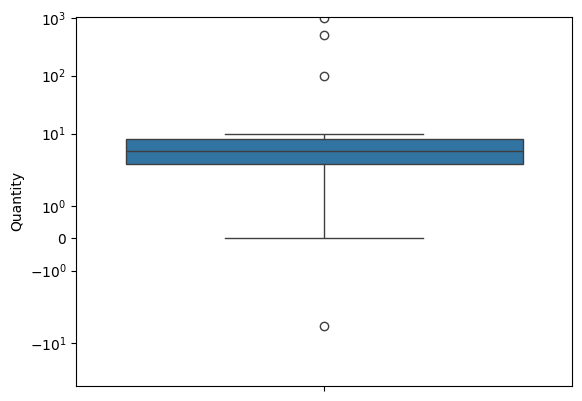

In [40]:
sns.boxplot(df["Quantity"])
plt.yscale("symlog")
plt.show()

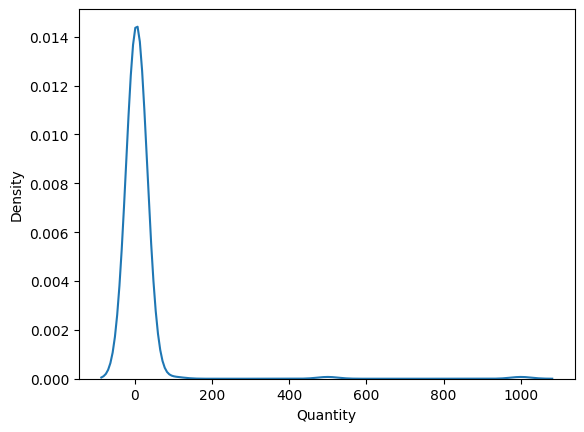

In [25]:
sns.kdeplot(df["Quantity"])
plt.show()

Outliers higher than 100 & less than 0

In [48]:
df[df["Quantity"] <= 0]

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,Quantity,Price,TotalAmount,CustomerLocation
15,1adf1bdb-6fed-44eb-bedb-852f1cce93d1,9f4bb174-aeb9-4209-bef5-602eebe36227,2024-07-17,ac7d6d40-48d7-4014-b901-17c9570d9d3c,Boks,-5,190.21,1839.61,North America
178,63528f2a-2f29-4b10-89b9-4707ce71e768,5fa7c375-7c92-4fb0-a9ec-1824319e071d,2024-01-19,0796a116-3c12-4050-816f-723f2fcaabb7,Sportz,0,193.31,1980.85,Asia


In [52]:
# Quantity values count that are higher than the third quartlie 75% of the data
df[df["Quantity"] > 8]["Quantity"].value_counts()

,count
Quantity,
10,24
9,18
500,1
100,1
1000,1


In [37]:
df[df["Quantity"] >= 100]

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,Quantity,Price,TotalAmount,CustomerLocation
91,d77f1503-9505-4e76-bae0-59360170b948,50c736d9-1d3c-4c2d-9d67-751a30f1568e,2024-07-23,81200651-598c-4b62-9edb-d437a375545d,Hom,500,348.77,3889.80,South America
162,106f4e7f-311e-42da-9d66-5a38c24d532f,aff747dd-d99d-45d7-aad1-a21e92e8f6af,2024-10-16,255753d9-3079-4b5a-a591-85b7664ef107,Beuty,100,54.33,1698.05,Europe
197,26b19dfe-8532-4d46-8e5d-3f4285a81960,2ca222fd-cbc6-4166-95ad-1c81c6bc1e2a,2024-08-11,cdbdb337-f839-408e-a9ae-1d3a25128961,Toyz,1000,254.63,3838.19,South America


Anomalies:


1.   Human error: Quantity -5 instead of 5
2.   Zero value for quantity, which could be estimated from TotalAmount if it has no anomalies
3.   Human error: entry of 1000 as reported above the order is a duplicate of another entry where the truth quantity is 9 instead of 1000
4.   For the other outliers, they seem unrealistic for the product categories



###Price column

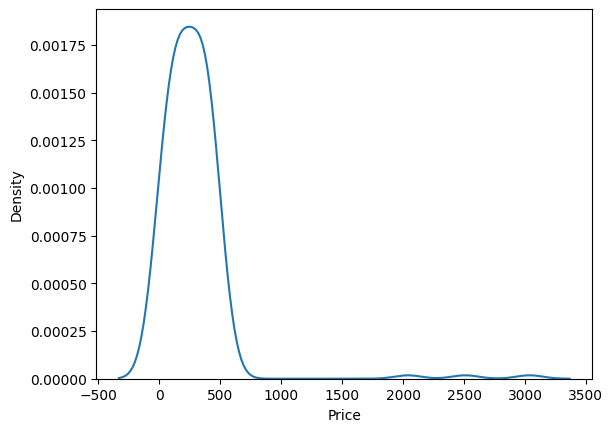

In [45]:
sns.kdeplot(df["Price"])
plt.show()

In [53]:
df[df["Price"] <= 0]

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,Quantity,Price,TotalAmount,CustomerLocation
63,7399a177-217a-46b1-8641-ff106866bda9,c61925b0-181b-449f-8df4-5822cefb72a4,2024-01-14,b1b1bfe2-84ed-4f6e-a30e-30dc13493ec4,Toyz,4,0.0,2447.59,Europe
86,67b61c3a-c9b7-446e-a93f-c9ca962af06a,3ae75934-88ee-4c05-81b0-2aef1fd0b1c2,2024-10-04,d9d1bb49-d391-4924-b9cb-dc6c2b9b12ad,Toyz,4,0.0,3492.63,Asia
144,125f0449-ff5f-419c-bc42-61f1d96bad90,76ebbb2e-c614-473c-a05d-3ab355414aa0,2024-08-14,36b1b2cc-d55b-4f68-b0be-a7420f3b07e3,Boks,6,-1.0,1184.38,Asia
167,8950724d-7dbf-437f-8107-d458a85e8694,d7d5a664-ebaf-463c-b2a6-7c7f0c6df1bf,2024-09-09,9ea91fe1-49f3-4d6b-a37d-f6b90bd357e1,Boks,4,0.0,1155.24,South America
189,b917e104-dfa4-4fa3-aa5d-778c60a8db84,a77ff11f-9b01-4a33-9728-e0d3c16bde7f,2024-01-28,b604184c-df19-4e4a-8768-e189dc0d10e6,Clothng,3,-2.5,4876.46,South America


In [55]:
df[df["Price"] > 1000]

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,Quantity,Price,TotalAmount,CustomerLocation
27,3d85cd44-1426-4795-b1b2-7d3eb8daa7f2,bc39066b-56b6-4aea-ad2f-90737deb9011,2024-09-20,e49f8697-5fd0-4911-8963-3a4bc08c45ef,Beuty,2,2039.05,110.74,Africa
115,e79d67bc-ee1f-41e9-a8c5-13eeea8a1b08,d8cc46b1-4151-448b-9c47-f55e2d2f9d86,2024-05-08,3220a4a8-b610-4b24-a102-0a09328ec7da,Boks,5,2510.60,58.33,North America
170,486dd2b7-4be6-42a1-80ec-2994caa9df00,6a07a3b5-b3b2-4a37-b7e2-8bfd431c912f,2024-07-07,047ee7a0-e709-413f-8955-f852a2ab116f,Sportz,9,3037.17,14.40,North America


Anomalies:

In five records:
1.   Zero price values, could be estimated from TotalAmount if it is correctly reflecting the `Quantity * Price`
2.   Human error: negative values supposed to be positive

In three records:
1.   Unrealistic prices (too high)
2.   Prices not matching with the TotalAmount





### TotalAmount column

In [67]:
(df["TotalAmount"] == df["Quantity"] * df["Price"]).sum()

0

Anomalies:


1.   incorrect calculation of the TotalAmount, not reflecting the right values of `Price * Quantity`



In [100]:
# Correct the TotalAmount values and check the distribution
df["TotalAmount_Corrected"] = df["Quantity"] * df["Price"]

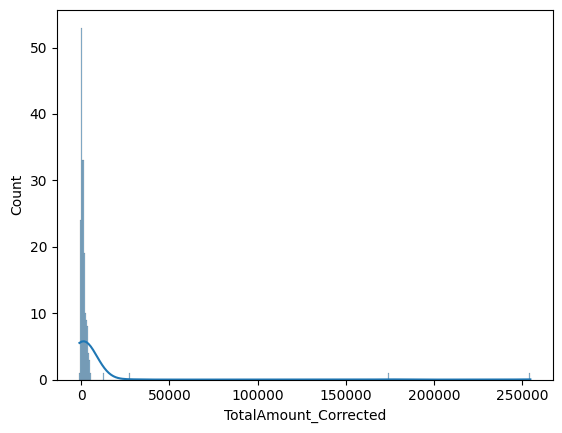

In [106]:
sns.histplot(df["TotalAmount_Corrected"], kde=True)
plt.show()

Data Quality issues in prices and quantity, that have been detected, could hugely affect the realistic expectations and skewed the data with unrealistic large cost of orders reach hundeed thousands.

## Data format

In [ ]:
df.dtypes

,0
OrderID,object
CustomerID,object
OrderDate,object
ProductID,object
ProductCategory,object
Quantity,int64
Price,float64
TotalAmount,float64
CustomerLocation,object


Anomalies:


1.   OrderDate in object format not datetime format





In [84]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"], format="%Y-%m-%d")

ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " 00:00:00", at position 19. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [85]:
pd.to_datetime(df["OrderDate"], format="mixed")

,OrderDate
0,2024-06-19
1,2024-03-30
2,2024-03-13
3,2024-06-01
4,2024-07-04
...,...
198,2024-05-06
199,2024-04-10
200,2024-10-04
201,2024-07-17


In [72]:
df['OrderDate'][19]

'2025-01-13 00:00:00'

In [87]:
without_timestamp = df[~df["OrderDate"].str.contains(":")]["OrderDate"]

In [88]:
without_timestamp = pd.to_datetime(without_timestamp)

In [90]:
without_timestamp[:3]

,OrderDate
0,2024-06-19
1,2024-03-30
2,2024-03-13


In [96]:
print("oldest date: ", without_timestamp.min())
print("latest date: ", without_timestamp.max())
print("number of records without timestamp format: ", len(without_timestamp))

oldest date:  2024-01-03 00:00:00
latest date:  2024-10-27 00:00:00
number of records without timestamp format:  193


In [91]:
with_timestamp = df[df["OrderDate"].str.contains(":")]["OrderDate"]

In [92]:
with_timestamp = pd.to_datetime(with_timestamp)

In [93]:
with_timestamp[:3]

,OrderDate
19,2025-01-13
97,2025-01-02
111,2025-01-13


In [97]:
print("oldest date: ", with_timestamp.min())
print("latest date: ", with_timestamp.max())
print("number of records with timestamp format: ", len(with_timestamp))

oldest date:  2025-01-01 00:00:00
latest date:  2025-01-30 00:00:00
number of records with timestamp format:  10


In [98]:
print("number of all date records: ", len(df["OrderDate"]))

number of all date records:  203


Anomalies:


1.   OrderDate has both formatting for date: with and without timestamp
2.   For records with timestamp are all future dates



## Missing Values

In [ ]:
df.isna().sum()

,0
OrderID,0
CustomerID,0
OrderDate,0
ProductID,0
ProductCategory,0
Quantity,0
Price,1
TotalAmount,20
CustomerLocation,0


Anomalies:


1.   Price and TotalAmount has missing values



In [99]:
df[df["Price"].isna() | df["TotalAmount"].isna()]

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,Quantity,Price,TotalAmount,CustomerLocation
0,23f2da2d-4cc5-42e1-bc62-a7d0e42ea50a,4a1f73ba-3579-404f-b0a1-1815b470b8c2,2024-06-19,cdce9658-d862-4586-98ac-ab37934c7ac7,Electornics,5,140.57,NaN,Asia
8,6b486220-e354-46ae-ad19-5acc5167c254,b70918e8-5df4-40e8-ab2e-8bc1a68f3d55,2024-10-15,e4158af7-eaea-476a-97ae-c533bda3235a,Sportz,3,361.85,NaN,Australia
9,9c689b36-aa46-4794-a601-53ea22b5df97,6d63565f-e1c7-487e-9a46-9d02f1173924,2024-09-08,6f40bc0b-5ab4-49c6-9084-e949dc88720d,Boks,5,114.22,NaN,Asia
23,47006868-578e-451a-8a99-908598f1d552,c8bbea21-dd5d-4b9b-94f7-5de64b427008,2024-04-23,3429c654-2d88-4a14-9bb1-53056156d690,Beuty,4,57.26,NaN,Europe
44,bedda067-ee8a-4afe-aca3-2e8b3df41cf4,2a183608-b351-4fc4-b2ad-d5ea1934c377,2024-07-04,6b250adb-f2bb-4e42-a5a0-596c8cdcc2ce,Toyz,10,96.86,NaN,South America
77,da006805-0e6b-41f3-a13a-786ef22cfeb1,57bc5738-5f96-47b6-ae9f-29240b3584ff,2024-09-07,f4d20476-2f16-4c5d-b87f-89969d91e4c0,Hom,3,218.73,NaN,South America
92,ae971471-a20b-497e-afe9-b9adfd4a6945,9688778b-395d-4428-9172-ef9120d4cc69,2024-07-08,947c1b26-bb86-487b-95ac-437ca13efb41,Beuty,3,161.79,NaN,Africa
106,12602d10-8a10-4c97-9c41-08223a8ca3ca,26c47308-c9fd-47dc-adb8-acba4b2aea55,2024-10-10,4648f3a6-cc55-4f3e-be04-ecb8a9ef3626,Toyz,2,NaN,295.07,Europe
107,8dba6d8f-7ab8-472c-bbfa-f3a1723f31ba,df038544-31fa-4177-8267-f803ae3fa2e5,2024-09-30,bc42940c-b81a-440c-9136-8e6bd3b8cf1d,Toyz,8,259.63,NaN,Africa
124,b22d888b-3813-4ad1-8c99-65796ec59896,789dba64-6720-4b7b-98f2-1de469633870,2024-10-27,cfd646bb-fa2f-4081-9914-c4d002cbc304,Toyz,2,487.16,NaN,Africa
